# Hope Conover Demo Notebook - Intro to Jupyter and Exploratory Data Analysis (EDA)

REQ: Open notebooks with a standard header including a good title, your company/name/alias, a link to the repo, purpose, and date.

REQ: For EDA projects, include dataset, description, and source information.

- Author: [Hope Conover](https://github.com/hopeconover/)
- Repository: [datafun-04-notebooks](https://github.com/hopeconover/datafun-04-notebooks/)
- Purpose: Demonstrate a repeatable EDA workflow for a new, unexplored dataset
- Date: 2026-02

## Dataset Information

- Dataset: Titanic 
- Description: Titanic passenger data including demographics, survival status and the port of embarkation.
- Source: https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv
- Original Collection: [Titanic Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)
- Citation: Will Cukierski. Titanic - Machine Learning from Disaster. https://kaggle.com/competitions/titanic, 2012. Kaggle.
- Access: Available via Seaborn's built-in datasets

This is a Markdown cell.

## Section 0. Intro to Jupyter Notebooks

This is a Markdown cell (not a Python cell). 
Here are a few tips to help you get started with Jupyter Notebooks:

- To run a cell, press **Ctrl+Enter** (or **Cmd+Enter** on Mac) when you're done editing the cell.
- You can change the type of a cell (e.g., code or markdown) by looking in the lower left corner of the notebook interface.
- You can rearrange cells by dragging and dropping them within the notebook.
- After creating a new notebook, use **File > Save as** to rename and save it into your repository folder.
- To select a kernel (Python environment) for your notebook in Visual Studio Code, click on the **Select Kernel** name in the top-right corner of the notebook interface and choose the desired kernel from the dropdown menu. Follow suggestions to install recommended extensions. Once installed, click Select Kernel / Python Environments and choose the Recommended `.venv` option we created earlier. This will create a new kernel for the notebook and allow you to run code in the notebook using the packages installed in the virtual environment.

Once you are skilled with Notebooks, you can delete this entire cell or make your own notes.

This is a Markdown cell.  


## Section 1. Project Setup and Imports

All imports and configuration appear once, at the top of the notebook.

WHY:
- Keeps notebooks readable and reproducible
- Mirrors professional scripts
- Makes it clear what must be installed

This is a Markdown cell.

In [1]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

Imports complete.


## Section 2. Load the Data

This is a Markdown cell.

WHY: Before analysis, load the data to confirm:

- The dataset loads successfully
- The structure matches expectations
- Column names are available and readable

This is a Markdown cell.

In [2]:
# Python cell

# Load the titanic dataset from Seaborn
# Into a pandas DataFrame (2D table)
titanic_df: pd.DataFrame = sns.load_dataset("titanic")

# Preview the first few rows
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 3. Inspect Data Shape and Structure

WHY: First, understand the shape (basic structure) of the data:

- How many rows and columns are there?
- What types of data are present?
- Are there obvious missing values?

This step determines challenges we might have downstream (later).

This is a Markdown cell.

In [3]:
# Section 3 Python cell

# Get shape - number of rows and columns
shape: tuple[int, int] = titanic_df.shape

# Communicate the shape clearly
print(f"The titanic dataset has {shape[0]} rows and {shape[1]} columns.")

The titanic dataset has 891 rows and 15 columns.


In [4]:
# Section 3 Python cell

# Display column names and data types
titanic_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [14]:
# Section 3 Python cell

# List the column names
print("Column names:")
print(list(titanic_df.columns))

Column names:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


## Section 4. Create Data Dictionary and Check Data Quality

WHY: Missing data is normal. We need to find out how much and where.

Missing data affects:

- Visualizations
- Summary statistics
- Machine learning models

LOOK FOR: 

- Columns with many missing values
- Patterns (entire rows missing multiple fields)

This is a Markdown cell.


In [6]:
# Section 4 Python cell

# Count missing values in each column
print("Missing values per column:")
print(titanic_df.isnull().sum())

Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
# Section 4 Python cell

# Check for duplicate rows
num_duplicates = titanic_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 107


## Section 5. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

This is a Markdown cell.

In [8]:
# Section 5 Python cell

# Create a clean view by dropping rows with any missing values
titanic_clean: pd.DataFrame = titanic_df.dropna()

# Compare sizes
print(f"Original dataset: {len(titanic_df)} rows")
print(f"Clean dataset: {len(titanic_clean)} rows")
print(f"Rows removed: {len(titanic_df) - len(titanic_clean)}")

Original dataset: 891 rows
Clean dataset: 182 rows
Rows removed: 709


## Section 6. Descriptive Statistics for Numeric Columns

WHY: Summary statistics give us a quick overview of the numeric data:

- Central tendency (mean)
- Spread (std, min, max)
- Distribution shape (quartiles)

This is a Markdown cell.

In [9]:
# Section 6 Python cell

# Summary statistics for numeric columns
titanic_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [10]:
# Section 6 Python cell

# AND/OR Calculate statistics for a specific column with numpy
mean_age = np.mean(titanic_clean["age"])
std_age = np.std(titanic_clean["age"])
min_age = np.min(titanic_clean["age"])
max_age = np.max(titanic_clean["age"])
range_age = np.ptp(titanic_clean["age"])  # peak to peak (max - min)
print("Age Statistics (using numpy):")
print(f"  Mean: {mean_age:.2f} years")
print(f"  Std Dev: {std_age:.2f} years")
print(f"  Min: {min_age:.2f} years")
print(f"  Max: {max_age:.2f} years")
print(f"  Range: {range_age:.2f} years")

Age Statistics (using numpy):
  Mean: 35.62 years
  Std Dev: 15.63 years
  Min: 0.92 years
  Max: 80.00 years
  Range: 79.08 years


## Section 7. Correlation Matrix for Numeric Columns

WHY: Correlation tells us how numeric variables relate to each other.

- Values near 1 or -1 indicate strong relationships
- Values near 0 indicate weak or no linear relationship

This is a Markdown cell.

In [11]:
# Section 7 Python cell

# Select only numeric columns and compute correlation
numeric_cols = titanic_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.037698 -0.251045  0.101376  0.018739  0.130632
pclass   -0.037698  1.000000 -0.305708 -0.105262  0.046273 -0.316796
age      -0.251045 -0.305708  1.000000 -0.154160 -0.269757 -0.090730
sibsp     0.101376 -0.105262 -0.154160  1.000000  0.253478  0.284841
parch     0.018739  0.046273 -0.269757  0.253478  1.000000  0.388540
fare      0.130632 -0.316796 -0.090730  0.284841  0.388540  1.000000


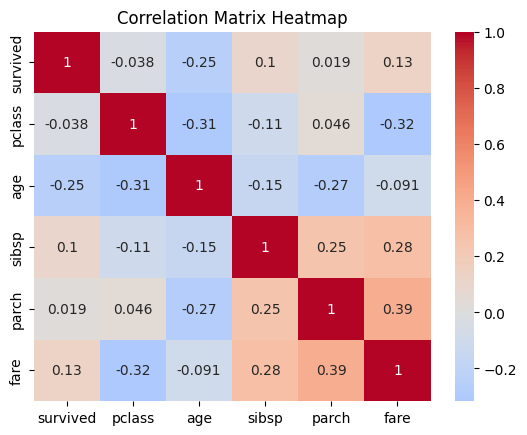

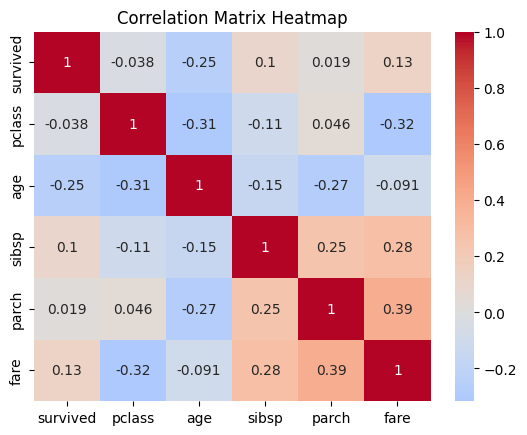

In [12]:
# Section 7 Python cell

# Visualize the correlation matrix as a heatmap
# Set annotations to True to show correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


Use Markdown cells to narrate and tell the story as you explore.

Interpretation:

 - Values close to 1 (dark red) = strong positive correlation (both increase together)
 - Values close to -1 (dark blue) = strong negative correlation (one increases, other decreases)
 - Values close to 0 (white) = little or no linear relationship
 - The diagonal is always 1 (each variable correlates perfectly with itself)

From this heatmap, we can see that **flipper_length_mm** and **body_mass_g** show strong positive correlation (~0.87).

This is a Markdown cell.

## Section 8. Make Plots

WHY: Visualizations reveal patterns not obvious in tables.

Create:
1. A scatter plot to see relationships between two variables
2. A box plot to compare distributions across groups

This is a Markdown cell.

Text(0.5, 1.0, 'Chart 1. Fare vs Passenger Class (by Sex)')

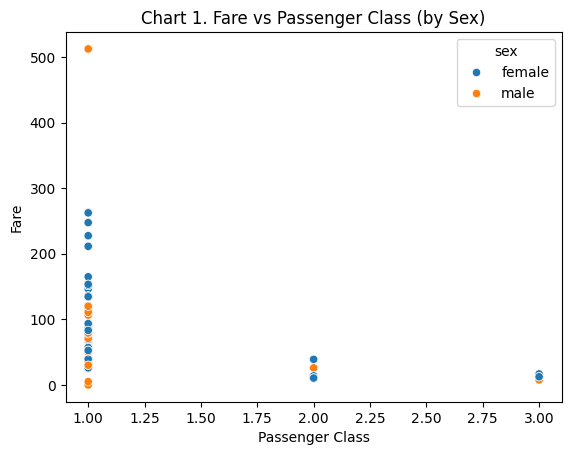

In [13]:
# Section 8 Python cell - use "Run All" so prior cells are executed first.

# Create a scatter plot of ticket fare vs passenger class
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(data=titanic_clean, x="pclass", y="fare", hue="sex")

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Passenger Class")
scatter_plt.set_ylabel("Fare")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Fare vs Passenger Class (by Sex)")
# Run by clicking Run All in the Menu up top

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 

This is a Markdown cell.
